
# Proyecto : Asistencia de Citas Médicas en Brasil

## Tabla de Contenido
<ul>
<li><a href="#intro">Introducción</a></li>
<li><a href="#wrangling">Disputa de Datos</a></li>
<li><a href="#eda">Análisis Exploratorio de Datos</a></li>
<li><a href="#conclusions">Conclusiones</a></li>
</ul>

<a id='intro'></a>
## Introducción

> Este base de datos recopila información de 100 mil citas médicas en Brasil y se centra en la cuestión de si los pacientes se presentan o no para su cita previa. Un numero de las características del paciente son incluidos en cada fila.



In [65]:
# Importación para todos los paquetes que se utilizarán

import pandas as pd
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling

> En esta sección del informe: cargue los datos, verifique que estén limpios y luego recorte y limpie el conjunto de datos para su análisis. 

### Propiedades Generales

Head : cargar el base de datos

In [5]:
df = pd.read_csv('No_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Describe: Para ver los recuentos de cada columna y la media de los valores.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Info: - Si faltan valores para cada columna.
      - Tipo de datos de cada columna y su compatibilidad.
      - La forma del base de datos: no. de filas (110527) y no. de columnas (14).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




### Data Cleaning 

Null: No hay valores nulos, por lo que no es necesario completar los valores N/A.

In [8]:
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Comprobando valores duplicados (no hay)

In [9]:
df.duplicated().sum()

0

Drop: elimine la columna de ID del paciente porque sus valores no significan nada

In [10]:
df=df.drop(columns={'PatientId'})

In [11]:
df.head(1)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


dtypes: se comprobó el tipo de datos ScheduleDay y AppointmentDay. Se encontró que su tipo de datos es "String" que debe convertirse al tipo de datos "DateTime".

In [12]:
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
df.dtypes

AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Convierta todas las columnas (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, and Sms_recieved) a valores booleanos 'Verdadero' y 'Falso' mejor que números enteros de 0 y 1.

In [13]:
df.loc[:,'Scholarship':'SMS_received']=df.loc[:,'Scholarship':'SMS_received'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   AppointmentID   110527 non-null  int64              
 1   Gender          110527 non-null  object             
 2   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  bool               
 7   Hipertension    110527 non-null  bool               
 8   Diabetes        110527 non-null  bool               
 9   Alcoholism      110527 non-null  bool               
 10  Handcap         110527 non-null  bool               
 11  SMS_received    110527 non-null  bool               
 12  No-show         110527 non-null  object             
dtypes: bool(6), da

Cambie el nombre de la columna "no-show" a "no_show" para poder acceder fácilmente y el resto en minúsculas.

In [15]:
df.rename(str.lower, axis='columns',inplace=True)

In [17]:
df.rename(columns={'no-show':'no_show'},inplace=True)

In [18]:
df.head()

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


<a id='eda'></a>
## Análisis de Datos



### Pregunta de Investigación: ¿Qué hace que los clientes se presenten o no en la fecha programada?

> Explorar la relación de cada factor en la base de datos con un paciente que no se presenta en la fecha programada

In [23]:
df_Yes=df[df['no_show']=='Yes']
df_No=df[df.no_show=='No']

Cuando la columna de "no show" es sí, eso significa que el paciente no llegó a la fecha programada

In [66]:
df_Yes.head()

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
6,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,False,Yes
7,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,False,False,Yes
11,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,False,False,False,False,False,True,Yes
17,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,True,False,False,False,False,False,Yes
20,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,False,False,Yes


Cuando la columna de "no show" es no, eso significa que el paciente llegó a la fecha programada

In [67]:
df_No.head()

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


### 1.1 Género

In [19]:
df.groupby('no_show').gender.value_counts()

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: count, dtype: int64

In [20]:
df_males=df[df.gender=='M']
df_females=df[df.gender=='F']

In [21]:
total_M=df_males.no_show.value_counts().sum()
total_F=df_females.no_show.value_counts().sum()
per_M=(df_males.no_show.value_counts()/total_M)*100
per_F=(df_females.no_show.value_counts()/total_F)*100
per_M, per_F

(no_show
 No     80.032052
 Yes    19.967948
 Name: count, dtype: float64,
 no_show
 No     79.685412
 Yes    20.314588
 Name: count, dtype: float64)

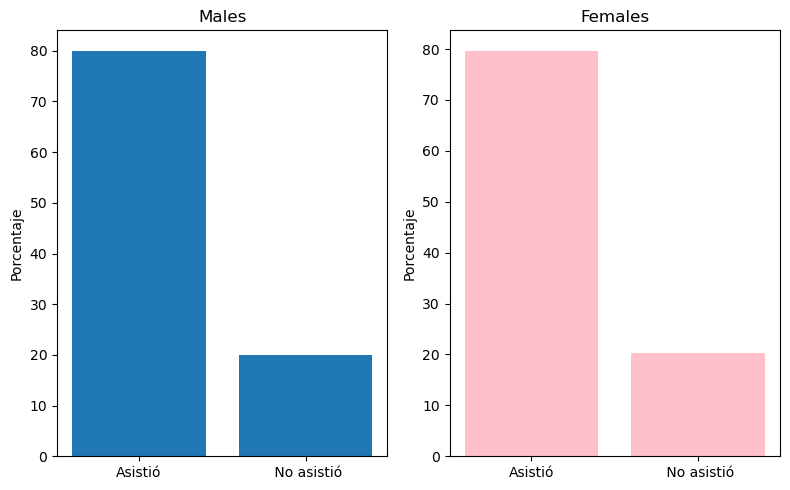

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].bar(["Asistió"," No asistió"],per_M)
axes[0].title.set_text('Males')
axes[0].set_ylabel('Porcentaje');
axes[1].bar(["Asistió"," No asistió"],per_F, color='pink')
axes[1].title.set_text('Females')
axes[1].set_ylabel('Porcentaje');
fig.tight_layout()

#### El género no tiene ningún efecto en la asistencia. Ambos tienen el mismo porcentaje de no presentarse.

### 1.2 Beca

In [24]:
val_sch=df_Yes.groupby('no_show').scholarship.value_counts()
val_sch

no_show  scholarship
Yes      False          19741
         True            2578
Name: count, dtype: int64

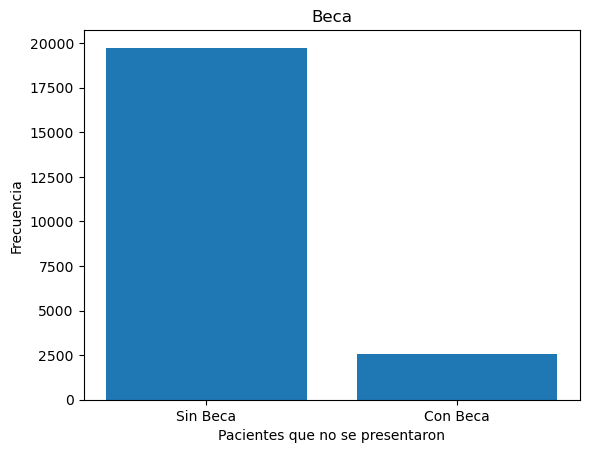

In [86]:
plt.bar(["Sin Beca","Con Beca"],val_sch)
plt.title('Beca')
plt.xlabel('Pacientes que no se presentaron')
plt.ylabel('Frecuencia');

In [68]:
(val_sch[0]-val_sch[1])/val_sch[0]*100

86.9408844536751

#### Tener una beca reduce la posibilidad de que los pacientes no asistan en un 87%

### 1.3 Hipertensión

In [26]:
val_hip=df_Yes.groupby('no_show').hipertension.value_counts()
val_hip

no_show  hipertension
Yes      False           18547
         True             3772
Name: count, dtype: int64

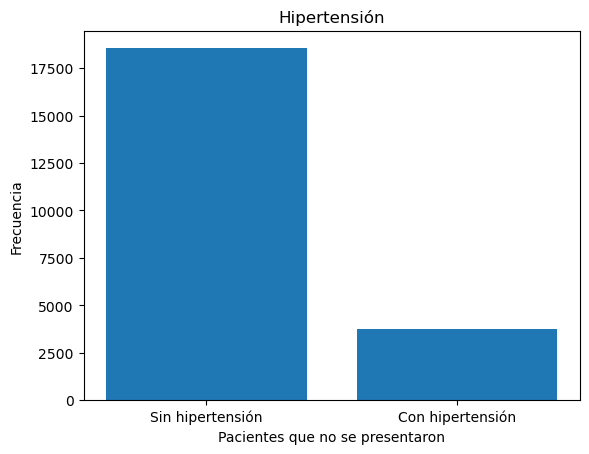

In [87]:
plt.bar(["Sin hipertensión","Con hipertensión"],val_hip)
plt.title('Hipertensión')
plt.xlabel('Pacientes que no se presentaron')
plt.ylabel('Frecuencia');

In [69]:
(val_hip[0]-val_hip[1])/val_hip[0]*100

79.66247910713324

#### Tener hipertensión reduce la posibilidad de que los pacientes no asistan en un 79%.

### 1.4 Diabetes

In [28]:
val_dbt=df_Yes.groupby('no_show').diabetes.value_counts()
val_dbt

no_show  diabetes
Yes      False       20889
         True         1430
Name: count, dtype: int64

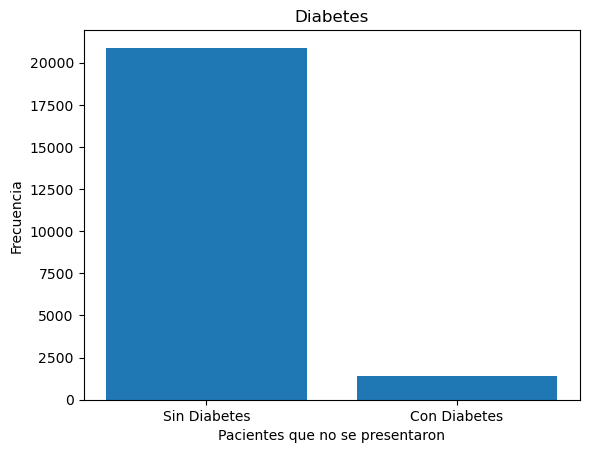

In [88]:
plt.bar(["Sin Diabetes","Con Diabetes"],val_dbt)
plt.title('Diabetes')
plt.xlabel('Pacientes que no se presentaron')
plt.ylabel('Frecuencia');

In [70]:
(val_dbt[0]-val_dbt[1])/val_dbt[0]*100

93.15429173249078

#### Tener diabetes reduce la posibilidad de que los pacientes no asistan en un 93%

### 1.5 Alcoholismo

In [31]:
val_alc=df_Yes.groupby('no_show').alcoholism.value_counts()
val_alc

no_show  alcoholism
Yes      False         21642
         True            677
Name: count, dtype: int64

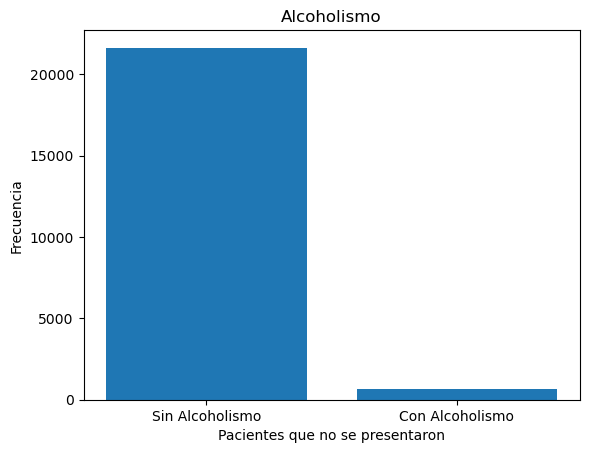

In [89]:
plt.bar(["Sin Alcoholismo","Con Alcoholismo"],val_alc)
plt.title('Alcoholismo')
plt.xlabel('Pacientes que no se presentaron')
plt.ylabel('Frecuencia');

In [71]:
(val_alc[0]-val_alc[1])/val_alc[0]*100

96.87182330653359

#### Tener alcoholismo reduce la posibilidad de que los pacientes no asistan en un 97%

### 1.6 Discapacitad

In [34]:
val_handicap=df_Yes.groupby('no_show').handcap.value_counts()
val_handicap

no_show  handcap
Yes      False      21912
         True         407
Name: count, dtype: int64

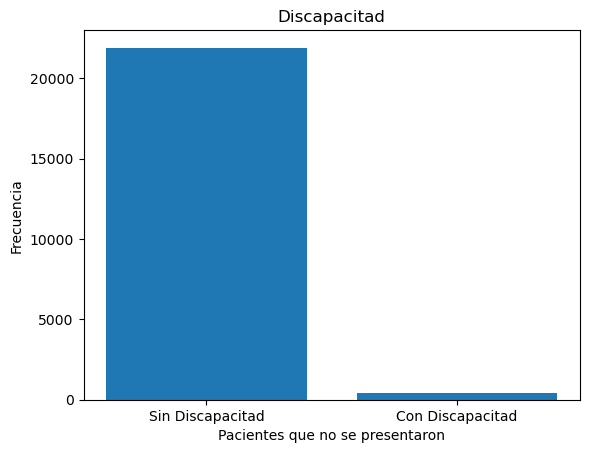

In [90]:
plt.bar(["Sin Discapacitad","Con Discapacitad"],val_handicap)
plt.title('Discapacitad')
plt.xlabel('Pacientes que no se presentaron')
plt.ylabel('Frecuencia');

In [72]:
(val_handicap[0]-val_handicap[1])/val_handicap[0]*100

98.14257028112449

#### Ser discapacitado reduce la posibilidad de que los pacientes no asistan en un 98%

### 1.7 SMS

In [37]:
val_sms=df_Yes.groupby('no_show').sms_received.value_counts()
val_sms

no_show  sms_received
Yes      False           12535
         True             9784
Name: count, dtype: int64

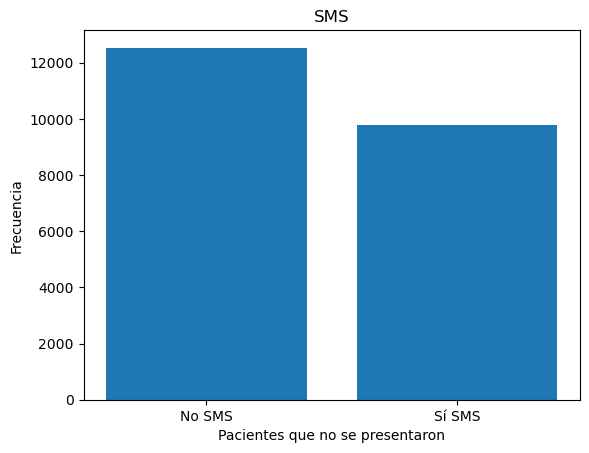

In [91]:
plt.bar(["No SMS","Sí SMS"],val_sms)
plt.title('SMS')
plt.xlabel('Pacientes que no se presentaron')
plt.ylabel('Frecuencia');

In [39]:
(val_sms[0]-val_sms[1])/val_sms[0]*100

21.94654966094934

#### Recibir un SMS reduce en un 22% la posibilidad de que los pacientes no asistan

### 1.8 Edad

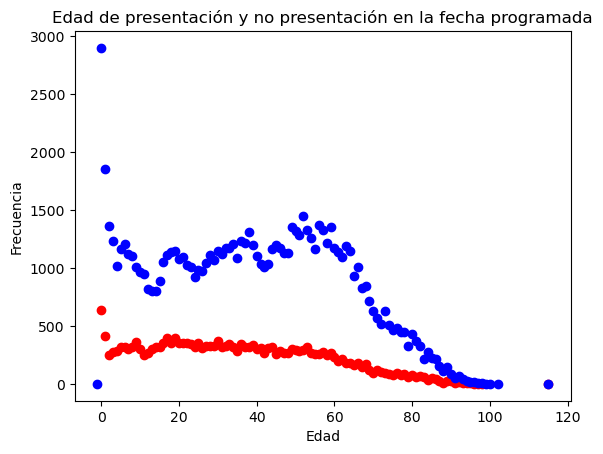

In [85]:
ans_Yes=df_Yes.age.value_counts()
ans_No=df_No.age.value_counts()

plt.title('Edad de presentación y no presentación en la fecha programada')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.scatter(x=ans_Yes.index, y=ans_Yes,color='red')
plt.scatter(x=ans_No.index, y=ans_No,color='blue')
plt.show()

*Línea azul*: pacientes que no se presentaron

*Línea roja*: pacientes que se presentaron

#### Después de 60 años, los pacientes que no se presentan en la fecha se reducen hasta igualar a los que se presentaron. Esto se debe a que los mayores tienen más miedo a las enfermedades que los más jóvenes.

<a id='conclusions'></a>
## Conclusión

1- Hay factores que no se pueden controlar como tener alguna enfermedad o beca, lo que prácticamente obliga al cliente a asistir en la fecha prevista.

2- Enviar un recordatorio por SMS es el único factor que se puede controlar, pero su efecto es sólo un 21% menor que no enviar un SMS.

##### *Posible solución*: realizar un cuestionario sobre los métodos preferidos para recordar a los clientes su cita. Esto puede ayudar a descubrir otras formas efectivas además de los SMS.
